In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv("6 advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


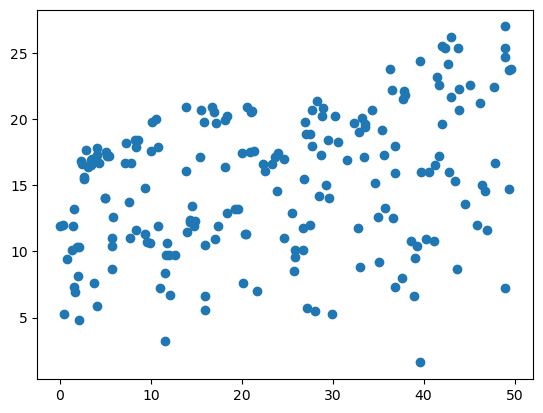

In [4]:
plt.scatter(x=df['Radio'],y=df['Sales'])

# Train Test Split

In [5]:

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

# Applying Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [8]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# Metrics R2_score

In [9]:
from sklearn.metrics import r2_score,mean_absolute_error
mean_absolute_error(y_test,y_pred)

1.2748262109549344

In [10]:
r2_score(y_test,y_test)

1.0

# Predictive system

In [11]:
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features = np.array([[tv_budget,radio_budget,newspaper_budget]])
    results = lr.predict(features).reshape(1,-1)
    return results[0]

In [12]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [13]:
tv_budget= 230.1
radio_budget =  37.8
newspaper_budget =  69.2
sales = predict_sales(tv_budget,radio_budget,newspaper_budget)

C:\Users\Ayush Kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
sales

array([21.37254028])

In [15]:
import pickle

pickle.dump(lr,open('linear_regression_model.pkl','wb'))